In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
import pandas as pd
import glob
import os

pfad = "../data/tageswerte_pro_Jahr/*.csv"   # z.B. "data/*.csv" oder "C:/Users/du/fahrrad/*.csv"

dateien = glob.glob(pfad)
dfs = []
for datei in dateien:
    df_temp = pd.read_csv(datei)
    jahr = os.path.basename(datei).split("_")[2].split(".")[0]
    df_temp["year"] = jahr
    dfs.append(df_temp.astype({"year":int}))

df = pd.concat(dfs, ignore_index=True)
df_ma = df[df["domain_name"] == 'Stadt Mannheim']



C:\Users\nikol\AppData\Local\Temp\ipykernel_6688\3387866908.py:10: DtypeWarning: Columns (10,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(datei)
C:\Users\nikol\AppData\Local\Temp\ipykernel_6688\3387866908.py:10: DtypeWarning: Columns (10,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(datei)


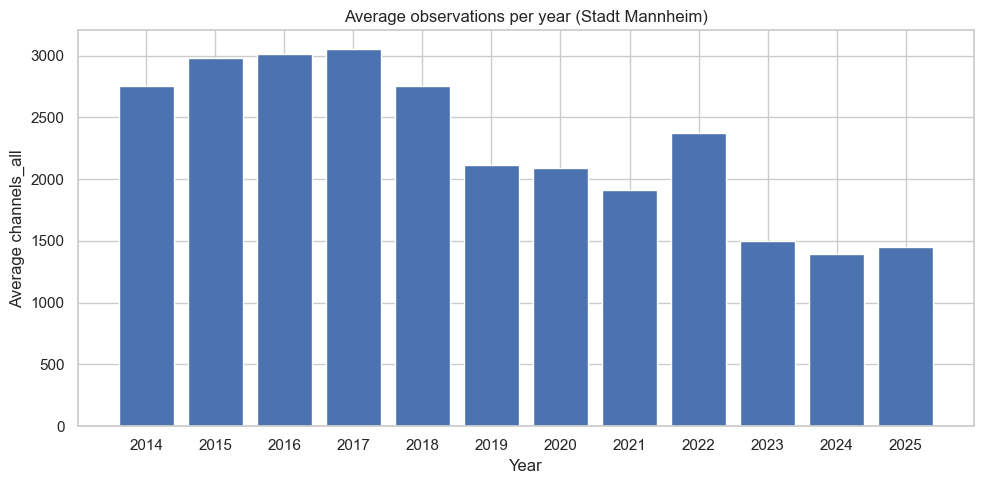

In [33]:
avg_per_year = df_ma.groupby("year")["channels_all"].mean()

avg_per_year = avg_per_year.sort_index()

plt.figure(figsize=(10, 5))
plt.bar(avg_per_year.index.astype(str), avg_per_year.values)

plt.xlabel("Year")
plt.ylabel("Average channels_all")
plt.title("Average observations per year (Stadt Mannheim)")
plt.tight_layout()
plt.show()

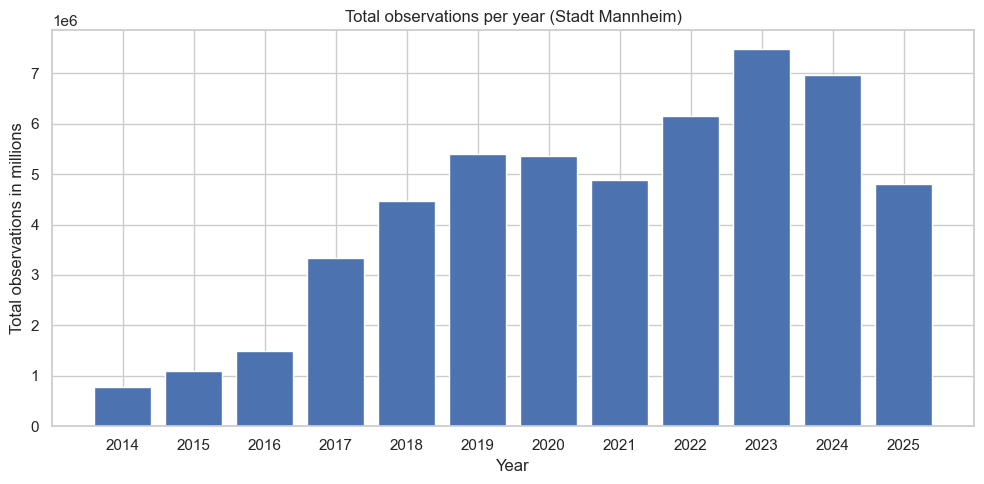

In [46]:
avg_per_year = df_ma.groupby("year")["channels_all"].sum()

avg_per_year = avg_per_year.sort_index()

plt.figure(figsize=(10, 5))
plt.bar(avg_per_year.index.astype(str), avg_per_year.values)

plt.xlabel("Year")
plt.ylabel("Total observations in millions")
plt.title("Total observations per year (Stadt Mannheim)")
plt.tight_layout()
plt.show()

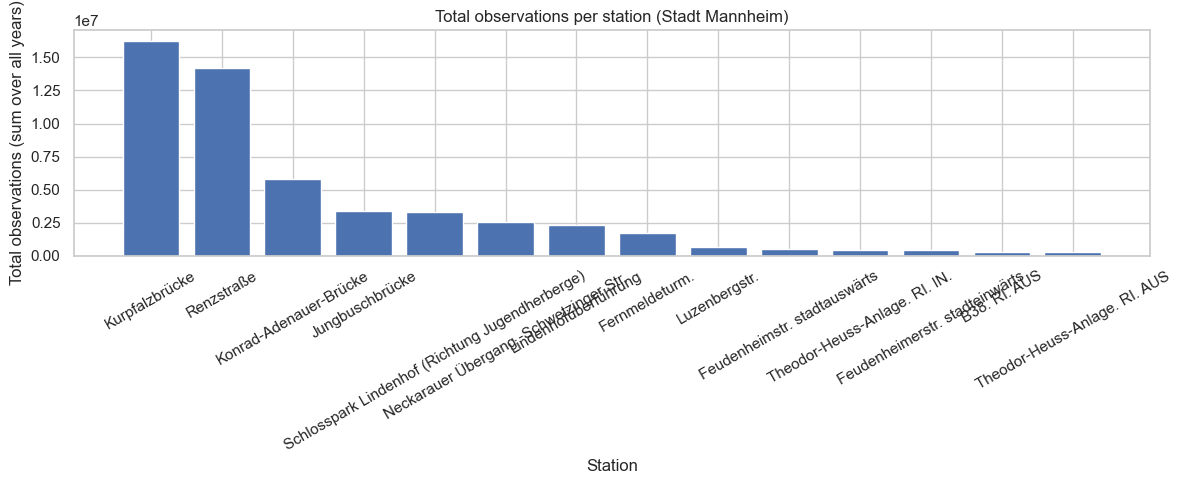

In [ ]:
station_sum = df_ma.groupby("counter_site")["channels_all"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
plt.bar(station_sum.index, station_sum.values)
plt.xticks(rotation=30)
plt.xlabel("Station")
plt.ylabel("Total observations (sum over all years) in millions")
plt.title("Total observations per station (Stadt Mannheim)")
plt.tight_layout()
plt.show()

In [ ]:
yearly_avg_ma = []
years=[]
for year in range(14,25):
    dfyear = pd.read_csv(f'../data/tageswerte_pro_Jahr/fahrradzaehler_tageswerten_20{year}.csv', delimiter=',')
    dfyear_ma = dfyear[dfyear["domain_name"] == 'Stadt Mannheim']
    yearly_avg_ma.append(np.mean(dfyear_ma["channels_all"]))
    years.append(f"20{year}")

plot_data = pd.DataFrame({
    'Year': years,
    'Average': yearly_avg_ma
})

C:\Users\nikol\AppData\Local\Temp\ipykernel_6688\2974708269.py:4: DtypeWarning: Columns (10,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfyear = pd.read_csv(f'../data/tageswerte_pro_Jahr/fahrradzaehler_tageswerten_20{year}.csv', delimiter=',')
C:\Users\nikol\AppData\Local\Temp\ipykernel_6688\2974708269.py:4: DtypeWarning: Columns (10,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfyear = pd.read_csv(f'../data/tageswerte_pro_Jahr/fahrradzaehler_tageswerten_20{year}.csv', delimiter=',')


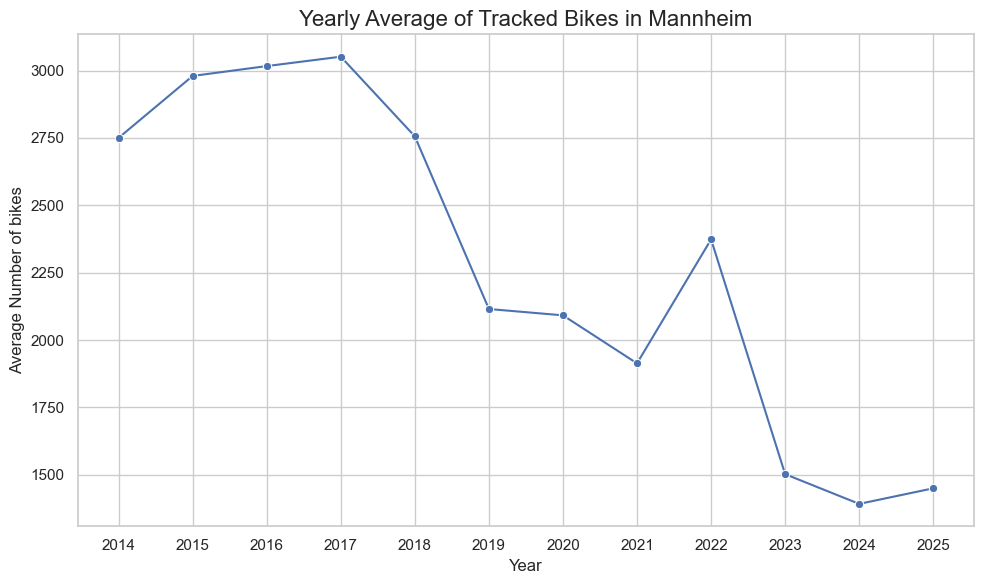

In [24]:
# WICHTIG Hier kommt der Absturz des Mittelwerts dadurch, dass mehr Zählstationen hinzugefügt wurden, die nicht an einem Hotspot standen, also Mittelwert sinkt.
sns.set(style="whitegrid")

# Create a line plot or bar plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Average', data=plot_data, marker='o')

# Optional: Customize the plot further
plt.title("Yearly Average of Tracked Bikes in Mannheim", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Number of bikes", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [4]:
# getrackte Räder nach channel site, also Standort der Zählstation im Jahr 2014
df15 = pd.read_csv(f'../data/tageswerte_pro_Jahr/fahrradzaehler_tageswerten_2019.csv', delimiter=',')
df15_ma = df15[df15["domain_name"] == 'Stadt Mannheim']
print(df15_ma)


          operator_name     domain_name  domain_id    counter_site  \
3285   Eco Counter GmbH  Stadt Mannheim       4197      Renzstraße   
3286   Eco Counter GmbH  Stadt Mannheim       4197      Renzstraße   
3287   Eco Counter GmbH  Stadt Mannheim       4197      Renzstraße   
3288   Eco Counter GmbH  Stadt Mannheim       4197      Renzstraße   
3289   Eco Counter GmbH  Stadt Mannheim       4197      Renzstraße   
...                 ...             ...        ...             ...   
10945  Eco Counter GmbH  Stadt Mannheim       4197  Kurpfalzbrücke   
10946  Eco Counter GmbH  Stadt Mannheim       4197  Kurpfalzbrücke   
10947  Eco Counter GmbH  Stadt Mannheim       4197  Kurpfalzbrücke   
10948  Eco Counter GmbH  Stadt Mannheim       4197  Kurpfalzbrücke   
10949  Eco Counter GmbH  Stadt Mannheim       4197  Kurpfalzbrücke   

       counter_site_id counter_serial  longitude   latitude  \
3285         100013246    YTH21025244   8.481114  49.490270   
3286         100013246    YTH2102